# E15: Bernoulli Process - From Raw Data to a Probabilistic Model

**Objective:** This notebook tells the story of how we can take a simple sequence of binary outcomes (success/failure) and build a robust probabilistic model. We are acting as reliability engineers who have observed a component over 40 trials and now need to quantify its behavior.

We will:
1.  **Estimate Reliability:** Start with the raw data and estimate the component's probability of success, `p`.
2.  **Visualize Convergence:** Watch how our estimate becomes more stable as we gather more evidence, a core concept known as the Law of Large Numbers.
3.  **Build the Model:** Formalize our findings by plotting the Probability Mass Function (PMF) and Cumulative Distribution Function (CDF) of the underlying Bernoulli distribution.
4.  **Quantify Key Metrics:** Calculate the model's mean and variance to summarize the component's performance and predictability.

### 1. Setup and Data Ingestion

Our journey begins by setting up our environment and loading the data. The data, from `Table 9`, represents 40 sequential observations where `1` denotes a successful operation and `0` a failure.

In [3]:
# Import necessary libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt

# Set a professional and clean style for our plots
plt.style.use('seaborn-v0_8-whitegrid')

# The sequence of 40 Bernoulli outcomes from the exercise
# (1 = success, 0 = failure)
outcomes = np.array([
    1, 1, 0, 1, 1, 1, 1, 0, 1, 1,  # First 10 trials
    1, 1, 1, 1, 0, 1, 1, 1, 1, 0,  # Trials 11-20
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  # Trials 21-30
    0, 1, 1, 1, 1, 0, 1, 1, 1, 1   # Trials 31-40
])

print(f"Total observations loaded: {len(outcomes)}")

Total observations loaded: 40


### (a) Estimating `p` and the Law of Large Numbers

In the real world, we don't know the "true" probability of success (`p`). We must estimate it from the data we collect. The most intuitive way is to calculate the proportion of successes.

But how much data is enough? Let's investigate how our estimate, which we call `p-hat` ($\hat{p}$), evolves as we observe more trials. This will give us a practical feel for the **Law of Large Numbers**, which states that our estimate gets closer to the true value as our sample size grows. This is the very reason why long-duration tests are crucial in reliability engineering.

Estimating p (p_hat) at different stages of the experiment:
  - After 10 trials, our estimate for p is 0.800
  - After 20 trials, our estimate for p is 0.800
  - After 30 trials, our estimate for p is 0.867
  - After 40 trials, our estimate for p is 0.850


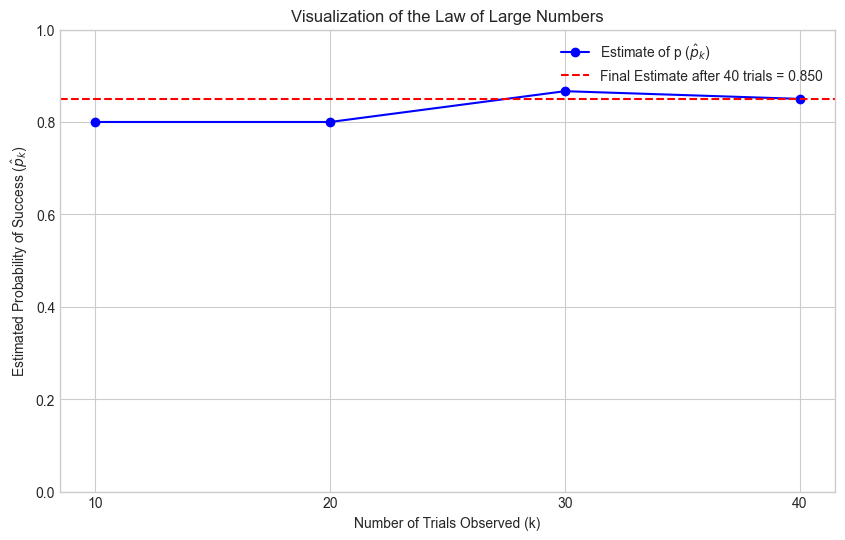

In [5]:
# We'll check our estimate at specific milestones
k_values = [10, 20, 30, 40]
p_estimates = []

print("Estimating p (p_hat) at different stages of the experiment:")
for k in k_values:
    # The sample proportion is simply the mean of the 0/1 outcomes up to k
    p_hat = np.mean(outcomes[:k])
    p_estimates.append(p_hat)
    print(f"  - After {k:2d} trials, our estimate for p is {p_hat:.3f}")

# Now, let's visualize the convergence
plt.figure(figsize=(10, 6))
# Using raw strings (r'...') to prevent SyntaxWarning
plt.plot(k_values, p_estimates, marker='o', linestyle='-', color='b', label=r'Estimate of p ($\hat{p}_k$)')

# We'll add a horizontal line showing our final, most informed estimate
final_p_hat = p_estimates[-1]
plt.axhline(y=final_p_hat, color='r', linestyle='--', label=f'Final Estimate after 40 trials = {final_p_hat:.3f}')

# Formatting the plot for clarity
plt.title('Visualization of the Law of Large Numbers')
plt.xlabel('Number of Trials Observed (k)')
# Using raw strings (r'...') to prevent SyntaxWarning
plt.ylabel(r'Estimated Probability of Success ($\hat{p}_k$)')
plt.xticks(k_values)
plt.ylim(0, 1) # Probability must be between 0 and 1
plt.legend()
plt.show()

### (b) Plotting the PMF and CDF

Our final estimate, $\hat{p}_{40} \approx 0.85$, is our best guess for the true probability of success. We can now build a formal probabilistic model for our component. This is the **Bernoulli Distribution**.

A distribution is best understood by visualizing its **Probability Mass Function (PMF)** and **Cumulative Distribution Function (CDF)**.

-   **PMF**: Shows the probability of each discrete outcome. For us, `P(X=0)` and `P(X=1)`.
-   **CDF**: Shows the probability of the outcome being less than or equal to a certain value.

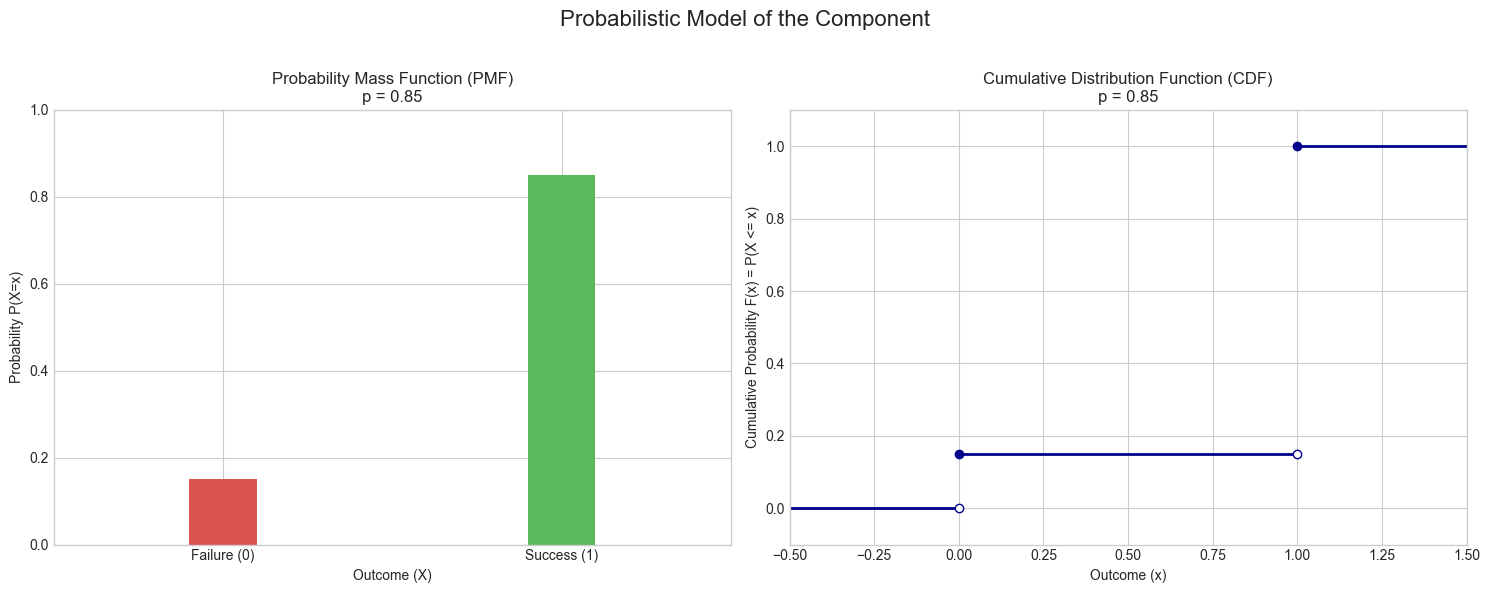

In [6]:
# Our best estimate for p is the final one, which is 0.85
p_hat_40 = final_p_hat
outcomes_x = [0, 1]
probabilities = [1 - p_hat_40, p_hat_40]

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- Plotting the PMF ---
ax1.bar(outcomes_x, probabilities, tick_label=['Failure (0)', 'Success (1)'], width=0.2, color=['#d9534f', '#5cb85c'])
ax1.set_title(f'Probability Mass Function (PMF)\np = {p_hat_40:.2f}')
ax1.set_xlabel('Outcome (X)')
ax1.set_ylabel('Probability P(X=x)')
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(0, 1)

# --- Plotting the CDF ---
# The CDF is a step function
ax2.hlines(y=0, xmin=-1, xmax=0, color='darkblue', lw=2)
ax2.hlines(y=1 - p_hat_40, xmin=0, xmax=1, color='darkblue', lw=2)
ax2.hlines(y=1, xmin=1, xmax=2, color='darkblue', lw=2)
# Add circles to show the jump points correctly (inclusive on the right)
ax2.plot(0, 1 - p_hat_40, 'o', color='darkblue') # Filled circle
ax2.plot(1, 1, 'o', color='darkblue')            # Filled circle
ax2.plot(0, 0, 'o', mfc='white', mec='darkblue') # Empty circle
ax2.plot(1, 1-p_hat_40, 'o', mfc='white', mec='darkblue') # Empty circle

ax2.set_title(f'Cumulative Distribution Function (CDF)\np = {p_hat_40:.2f}')
ax2.set_xlabel('Outcome (x)')
ax2.set_ylabel('Cumulative Probability F(x) = P(X <= x)')
ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.1, 1.1)

plt.suptitle('Probabilistic Model of the Component', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### (c) Calculating Key Metrics from the Model

A model is only useful if we can extract meaningful metrics from it. For any component, we want to know its average performance and its consistency.

-   **Expected Value (Mean)**: What is the average outcome we expect? For a Bernoulli variable, this is $E[X] = \sum x \cdot P(X=x)$.
-   **Variance**: How much do the outcomes vary around the mean? A lower variance means more predictable behavior. $Var(X) = \sum (x - E[X])^2 \cdot P(X=x)$.

Let's compute these directly from our PMF and verify they match the famous shortcuts for the Bernoulli distribution: $E[X]=p$ and $Var(X)=p(1-p)$.

In [7]:
x_values = np.array(outcomes_x)
pmf_values = np.array(probabilities)

# --- Calculate Expected Value from its fundamental definition ---
expected_value = np.sum(x_values * pmf_values)

# --- Calculate Variance from its fundamental definition ---
variance = np.sum(((x_values - expected_value)**2) * pmf_values)

print(f"Final estimate for p: {p_hat_40:.4f}")
print("-" * 50)
print("Metrics Calculated Directly from the PMF Definition:")
print(f"  - Expected Value E[X]: {expected_value:.4f}")
print(f"  - Variance Var(X):     {variance:.4f}")
print("-" * 50)
print("Metrics from Theoretical Formulas for Verification:")
print(f"  - E[X] = p = {p_hat_40:.4f}")
print(f"  - Var(X) = p(1-p) = {p_hat_40 * (1 - p_hat_40):.4f}")
print("-" * 50)

# Verify that our calculations match the formulas
assert np.isclose(expected_value, p_hat_40)
assert np.isclose(variance, p_hat_40 * (1 - p_hat_40))

print("✅ Verification successful: The results from both methods match perfectly.")

Final estimate for p: 0.8500
--------------------------------------------------
Metrics Calculated Directly from the PMF Definition:
  - Expected Value E[X]: 0.8500
  - Variance Var(X):     0.1275
--------------------------------------------------
Metrics from Theoretical Formulas for Verification:
  - E[X] = p = 0.8500
  - Var(X) = p(1-p) = 0.1275
--------------------------------------------------
✅ Verification successful: The results from both methods match perfectly.


### Final Thoughts

We started with a raw log of `0`s and `1`s and finished with a robust, quantitative understanding of the component's behavior. We saw firsthand how more data leads to a more stable estimate of reliability, we built a formal probabilistic model (PMF/CDF), and we calculated the key metrics (mean and variance) that define its performance and predictability. This process is a microcosm of the daily work in system evaluation and reliability engineering.